In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("data/Train.csv")
sub = pd.read_csv("data/SampleSubmission.csv")
variables = pd.read_csv("data/VariableDefinitions.csv")
Maize = pd.read_csv("data/Context_Data_Maize.csv")
Peanuts = pd.read_csv("data/Context_Data_Peanuts.csv")



In [3]:
train.head()

,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


In [4]:
train.shape

(28049, 15)

In [5]:
sub.shape

(5782, 2)

In [6]:
variables

,Variabe Definitions,Unnamed: 1
0,NaN,NaN
1,Train,NaN
2,timestamp,Time of recording in yyyy-mmm-dd hh-mm-ss
3,Soil_humidity_1,Soil humidity of field 1
4,Irrigation field 1,"1=irrigation on, 0=irrigation off"
5,Soil_humidity_2,Soil humidity of field 2
6,Irrigation field 2,"1=irrigation on, 0=irrigation off"
7,Soil_humidity_3,Soil humidity of field 3
8,Irrigation field 3,"1=irrigation on, 0=irrigation off"
9,Soil_humidity_4,Soil humidity of field 4


In [7]:
Peanuts.shape

(93, 15)

In [8]:
train.dtypes

timestamp                object
Soil humidity 1         float64
Irrigation field 1      float64
Soil humidity 2         float64
Irrigation field 2      float64
Soil humidity 3         float64
Irrigation field 3      float64
Soil humidity 4         float64
Irrigation field 4      float64
Air temperature (C)     float64
Air humidity (%)        float64
Pressure (KPa)          float64
Wind speed (Km/h)       float64
Wind gust (Km/h)        float64
Wind direction (Deg)    float64
dtype: object

In [9]:
Maize.dtypes

Date                 object
Min_Temp            float64
Max_Temp            float64
Humidity            float64
Wind_Speed          float64
Solar_Irradiance    float64
Sun                 float64
Kc                  float64
ETc                 float64
ETo                 float64
Rainfall            float64
Water_Need_1day     float64
Water_Need_2days    float64
Water_Need_3days    float64
dtype: object

In [10]:
train.isnull().sum()

timestamp                   0
Soil humidity 1         19132
Irrigation field 1      17983
Soil humidity 2          1745
Irrigation field 2         20
Soil humidity 3         11963
Irrigation field 3      10813
Soil humidity 4          1743
Irrigation field 4         20
Air temperature (C)      4054
Air humidity (%)         4054
Pressure (KPa)           4054
Wind speed (Km/h)        4054
Wind gust (Km/h)         4054
Wind direction (Deg)     4054
dtype: int64

## Handle Maize annd Peanuts

In [11]:
separate_columns =   pd.DataFrame(Maize['Date'].str.split('-',1).tolist(),
                                   columns = ['day','month'])

In [12]:
Maize["day"] = separate_columns["day"]
Maize["month"] = separate_columns["month"]

In [13]:
Maize["month"].unique()

array(['Feb', 'Mar', 'Apr', 'May'], dtype=object)

In [14]:
d={'Feb':2,'Mar':3,'Apr':4, 'May':5}
Maize["month"]=Maize["month"].apply(lambda x:d[x])

In [15]:
Maize["merging"] = Maize["day"]+"-"+ Maize["month"].astype(str)

In [16]:
Maize= Maize[['Min_Temp', 'Max_Temp', 'Humidity', 'Wind_Speed',
       'Solar_Irradiance', 'Sun', 'Kc', 'ETc', 'ETo', 'Rainfall',
       'Water_Need_1day', 'Water_Need_2days', 'Water_Need_3days', 'merging']]

In [17]:
separate_columns =   pd.DataFrame(Peanuts['Date'].str.split('-',1).tolist(),
                                   columns = ['day','month'])

In [18]:
Peanuts["day"] = separate_columns["day"]
Peanuts["month"] = separate_columns["month"]

In [19]:
Peanuts["month"].unique()

array(['Feb', 'Mar', 'Apr', 'May'], dtype=object)

In [20]:
d={'Feb':2,'Mar':3,'Apr':4, 'May':5}
Peanuts["month"]=Peanuts["month"].apply(lambda x:d[x])

In [21]:
Peanuts["merging"] = Peanuts["day"]+"-"+ Peanuts["month"].astype(str)

In [22]:
Peanuts= Peanuts[['Min_Temp', 'Max_Temp', 'Humidity', 'Wind_Speed',
       'Solar_Irradiance', 'Sun', 'Kc', 'ETc', 'ETo', 'Rainfall',
       'Water_Need_1day', 'Water_Need_2days', 'Water_Need_3days', 'merging']]


## Handle train  and test data

In [23]:
train.columns

Index(['timestamp', 'Soil humidity 1', 'Irrigation field 1', 'Soil humidity 2',
       'Irrigation field 2', 'Soil humidity 3', 'Irrigation field 3',
       'Soil humidity 4', 'Irrigation field 4', 'Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)'],
      dtype='object')

In [24]:
train["timestamp"] = pd.to_datetime(train["timestamp"], format="%Y-%m-%d %H:%M:%S")

In [25]:
train_1 = train[['timestamp', 'Soil humidity 1', 'Irrigation field 1',
        'Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)']]

In [26]:
train_2 = train[['timestamp', 'Soil humidity 2', 'Irrigation field 2',
        'Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)']]

In [27]:
train_3 = train[['timestamp', 'Soil humidity 3', 'Irrigation field 3',
        'Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)']]

In [28]:
train_4 = train[['timestamp', 'Soil humidity 4', 'Irrigation field 4',
        'Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)']]

In [29]:
train_1.head()

,timestamp,Soil humidity 1,Irrigation field 1,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,19.61,53.09,101.51,2.66,17.52,225.00


In [30]:
train_1.tail()

,timestamp,Soil humidity 1,Irrigation field 1,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
28044,2019-05-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28045,2019-05-31 09:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28046,2019-05-31 09:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28047,2019-05-31 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28048,2019-05-31 09:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
sub.head()

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,0
1,2019-03-25 22:55:00 x Soil humidity 1,0
2,2019-03-25 23:00:00 x Soil humidity 1,0
3,2019-03-25 23:05:00 x Soil humidity 1,0
4,2019-03-25 23:10:00 x Soil humidity 1,0


In [32]:
separate_columns =   pd.DataFrame(sub["ID"].str.split(' x Soil humidity ',1).tolist(),
                                   columns = ['timestamp','num_soil'])

In [33]:
sub["timestamp"] = separate_columns['timestamp']
sub["num_soil"] = separate_columns['num_soil']

In [34]:
sub["timestamp"] = pd.to_datetime(sub["timestamp"], format="%Y-%m-%d %H:%M:%S")

In [35]:
sub["timestamp"].unique().shape[0]

4053

In [36]:
train_1["num_soil"] = 1
train_2["num_soil"] = 2
train_3["num_soil"] = 3
train_4["num_soil"] = 4

C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [37]:
train_1["ID"] = train_1["timestamp"].astype(str)+" x " +"Soil humidity "+ train_1["num_soil"].astype(str)
train_2["ID"] = train_2["timestamp"].astype(str)+" x " +"Soil humidity "+ train_2["num_soil"].astype(str)
train_3["ID"] = train_3["timestamp"].astype(str)+" x " +"Soil humidity "+ train_3["num_soil"].astype(str)
train_4["ID"] = train_4["timestamp"].astype(str)+" x " +"Soil humidity "+ train_4["num_soil"].astype(str)


C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [38]:
test_1 = sub.loc[sub["num_soil"].astype(int)==1]
test_2 = sub.loc[sub["num_soil"].astype(int)==2]
test_3 = sub.loc[sub["num_soil"].astype(int)==3]
test_4 = sub.loc[sub["num_soil"].astype(int)==4]


In [39]:
test_1 = test_1[["ID","Values"]]
test_2 = test_2[["ID","Values"]]
test_3 = test_3[["ID","Values"]]
test_4 = test_4[["ID","Values"]]


In [40]:
train_1.head()

,timestamp,Soil humidity 1,Irrigation field 1,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg),num_soil,ID
0,2019-02-23 00:00:00,67.92,0.0,19.52,55.04,101.50,2.13,6.30,225.00,1,2019-02-23 00:00:00 x Soil humidity 1
1,2019-02-23 00:05:00,67.89,0.0,19.49,55.17,101.50,2.01,10.46,123.75,1,2019-02-23 00:05:00 x Soil humidity 1
2,2019-02-23 00:10:00,67.86,0.0,19.47,55.30,101.51,1.90,14.63,22.50,1,2019-02-23 00:10:00 x Soil humidity 1
3,2019-02-23 00:15:00,67.84,0.0,19.54,54.20,101.51,2.28,16.08,123.75,1,2019-02-23 00:15:00 x Soil humidity 1
4,2019-02-23 00:20:00,67.81,0.0,19.61,53.09,101.51,2.66,17.52,225.00,1,2019-02-23 00:20:00 x Soil humidity 1


In [41]:
test_1 = pd.merge(test_1,train_1, how ="left",on="ID")
test_2 = pd.merge(test_2,train_2, how ="left",on="ID")
test_3 = pd.merge(test_3,train_3, how ="left",on="ID")
test_4 = pd.merge(test_4,train_4, how ="left",on="ID")

In [42]:
test_4.head()

,ID,Values,timestamp,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg),num_soil
0,2019-05-25 07:45:00 x Soil humidity 4,0,2019-05-25 07:45:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2019-05-25 07:50:00 x Soil humidity 4,0,2019-05-25 07:50:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4
2,2019-05-25 07:55:00 x Soil humidity 4,0,2019-05-25 07:55:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4
3,2019-05-25 08:00:00 x Soil humidity 4,0,2019-05-25 08:00:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4
4,2019-05-25 08:05:00 x Soil humidity 4,0,2019-05-25 08:05:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4


In [43]:
test_3.isnull().sum()

ID                         0
Values                     0
timestamp                  0
Soil humidity 3         1150
Irrigation field 3         0
Air temperature (C)     1153
Air humidity (%)        1153
Pressure (KPa)          1153
Wind speed (Km/h)       1153
Wind gust (Km/h)        1153
Wind direction (Deg)    1153
num_soil                   0
dtype: int64

In [44]:
Maize.isnull().sum()

Min_Temp            22
Max_Temp            22
Humidity            22
Wind_Speed          22
Solar_Irradiance    22
Sun                 22
Kc                  10
ETc                 22
ETo                 23
Rainfall            10
Water_Need_1day     23
Water_Need_2days    23
Water_Need_3days    23
merging              0
dtype: int64

In [45]:
train_1["timestamp"] = pd.to_datetime(train_1["timestamp"], format="%Y-%m-%d %H:%M:%S")
train_2["timestamp"] = pd.to_datetime(train_2["timestamp"], format="%Y-%m-%d %H:%M:%S")
train_3["timestamp"] = pd.to_datetime(train_3["timestamp"], format="%Y-%m-%d %H:%M:%S")
train_4["timestamp"] = pd.to_datetime(train_4["timestamp"], format="%Y-%m-%d %H:%M:%S")
test_1["timestamp"] = pd.to_datetime(test_1["timestamp"], format="%Y-%m-%d %H:%M:%S")
test_2["timestamp"] = pd.to_datetime(test_2["timestamp"], format="%Y-%m-%d %H:%M:%S")
test_3["timestamp"] = pd.to_datetime(test_3["timestamp"], format="%Y-%m-%d %H:%M:%S")
test_4["timestamp"] = pd.to_datetime(test_4["timestamp"], format="%Y-%m-%d %H:%M:%S")


C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [46]:
min_test_1 = test_1["timestamp"].min()
min_test_2 = test_2["timestamp"].min() 
min_test_3 = test_3["timestamp"].min() 
min_test_4 = test_4["timestamp"].min() 

In [47]:
train_1 = train_1.loc[train_1["timestamp"] < min_test_1]
train_2 = train_2.loc[train_2["timestamp"] < min_test_2]
train_3 = train_3.loc[train_3["timestamp"] < min_test_3]
train_4 = train_4.loc[train_4["timestamp"] < min_test_4]


# Features engineering

In [48]:
data = [train_1,train_2,train_3,train_4, test_1,test_2,test_3,test_4]
for df in data:
    df["month"] = df["timestamp"].dt.month
    df["weekofyear"] = df["timestamp"].dt.weekofyear
    df["day"] = df["timestamp"].dt.day
    df["dayofweek"] = df["timestamp"].dt.dayofweek
    df["quarter"] = df["timestamp"].dt.quarter
    df["dayofyear"] = df["timestamp"].dt.dayofyear
    df["is_weekend"] = df["dayofweek"].apply( lambda x : 1 if x  in [5,6] else 0 ) 
    df["hour"] = df["timestamp"].dt.hour
    df["minute"] = df["timestamp"].dt.minute
    df["minuteofday"] = (df["hour"]*60) +df["minute"]
    df["AM/PM"] = df["hour"].apply( lambda x : 0 if x<12 else 1 ) 
    df["hourofmonth"] = (df["day"]*24)+df["hour"]
    df["minuteofmonth"] = (df["hourofmonth"]*60)+df["minuteofday"]
    df["hourofyear"] = (df["dayofyear"]*24)+df["hour"]
    df["minuteofyear"] = (df["hourofyear"]*60)+df["minuteofday"]
    df['sin_hour'] =  np.sin(2*np.pi*df['hour']/24)
    df['cos_hour'] =  np.cos(2*np.pi*df['hour']/24)
    df['sin_minute'] =  np.sin(df['minute']*(2.*np.pi/60))
    df['cos_minute'] =  np.sin(df['minute']*(2.*np.pi/60))
    df["secondofyear"] = df["minuteofyear"] *60
    df["secondofmonth"] = df["minuteofmonth"] *60 
    df["secondofday"] = df["minuteofday"] *60



In [49]:
data = [train_1,train_2,train_3,train_4, test_1,test_2,test_3,test_4]
for df in data:
    df["log_weekofyear"] = np.log(df["weekofyear"] )
    df["log_dayofyear"] = np.log(df["dayofyear"])
    df["log_minuteofday"] = np.log(df["minuteofday"] )
    df["log_hourofmonth"] = np.log(df["hourofmonth"] )
    df["log_minuteofmonth"] = np.log(df["minuteofmonth"])
    df["log_hourofyear"] = np.log(df["hourofyear"])
    df["log_minuteofyear"] = np.log(df["minuteofyear"] )





C:\Users\Aymen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [50]:
data = [train_1,train_2,train_3,train_4, test_1,test_2,test_3,test_4]
for df in data:
    df["merging"] = df["day"].astype(str)+"-"+ df["month"].astype(str)

### Merge data

In [51]:
train_1 = pd.merge(train_1,Maize, how ="left",on="merging")
train_2 = pd.merge(train_2,Maize, how ="left",on="merging")
train_3 = pd.merge(train_3,Maize, how ="left",on="merging")
train_4 = pd.merge(train_4,Maize, how ="left",on="merging")


In [52]:
test_1 = pd.merge(test_1,Maize, how ="left",on="merging")
test_2 = pd.merge(test_2,Maize, how ="left",on="merging")
test_3 = pd.merge(test_3,Maize, how ="left",on="merging")
test_4 = pd.merge(test_4,Maize, how ="left",on="merging")

In [53]:
test_1.isnull().sum()

ID                         0
Values                     0
timestamp                  0
Soil humidity 1         1150
Irrigation field 1         1
Air temperature (C)     1153
Air humidity (%)        1153
Pressure (KPa)          1153
Wind speed (Km/h)       1153
Wind gust (Km/h)        1153
Wind direction (Deg)    1153
num_soil                   0
month                      0
weekofyear                 0
day                        0
dayofweek                  0
quarter                    0
dayofyear                  0
is_weekend                 0
hour                       0
minute                     0
minuteofday                0
AM/PM                      0
hourofmonth                0
minuteofmonth              0
hourofyear                 0
minuteofyear               0
sin_hour                   0
cos_hour                   0
sin_minute                 0
cos_minute                 0
secondofyear               0
secondofmonth              0
secondofday                0
log_weekofyear

In [54]:
test_1.columns

Index(['ID', 'Values', 'timestamp', 'Soil humidity 1', 'Irrigation field 1',
       'Air temperature (C)', 'Air humidity (%)', 'Pressure (KPa)',
       'Wind speed (Km/h)', 'Wind gust (Km/h)', 'Wind direction (Deg)',
       'num_soil', 'month', 'weekofyear', 'day', 'dayofweek', 'quarter',
       'dayofyear', 'is_weekend', 'hour', 'minute', 'minuteofday', 'AM/PM',
       'hourofmonth', 'minuteofmonth', 'hourofyear', 'minuteofyear',
       'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute', 'secondofyear',
       'secondofmonth', 'secondofday', 'log_weekofyear', 'log_dayofyear',
       'log_minuteofday', 'log_hourofmonth', 'log_minuteofmonth',
       'log_hourofyear', 'log_minuteofyear', 'merging', 'Min_Temp', 'Max_Temp',
       'Humidity', 'Wind_Speed', 'Solar_Irradiance', 'Sun', 'Kc', 'ETc', 'ETo',
       'Rainfall', 'Water_Need_1day', 'Water_Need_2days', 'Water_Need_3days'],
      dtype='object')

In [55]:
train_1 = pd.merge(train_1,Peanuts, how ="left",on="merging")
train_2 = pd.merge(train_2,Peanuts, how ="left",on="merging")
train_3 = pd.merge(train_3,Peanuts, how ="left",on="merging")
train_4 = pd.merge(train_4,Peanuts, how ="left",on="merging")
test_1 = pd.merge(test_1,Peanuts, how ="left",on="merging")
test_2 = pd.merge(test_2,Peanuts, how ="left",on="merging")
test_3 = pd.merge(test_3,Peanuts, how ="left",on="merging")
test_4 = pd.merge(test_4,Peanuts, how ="left",on="merging")



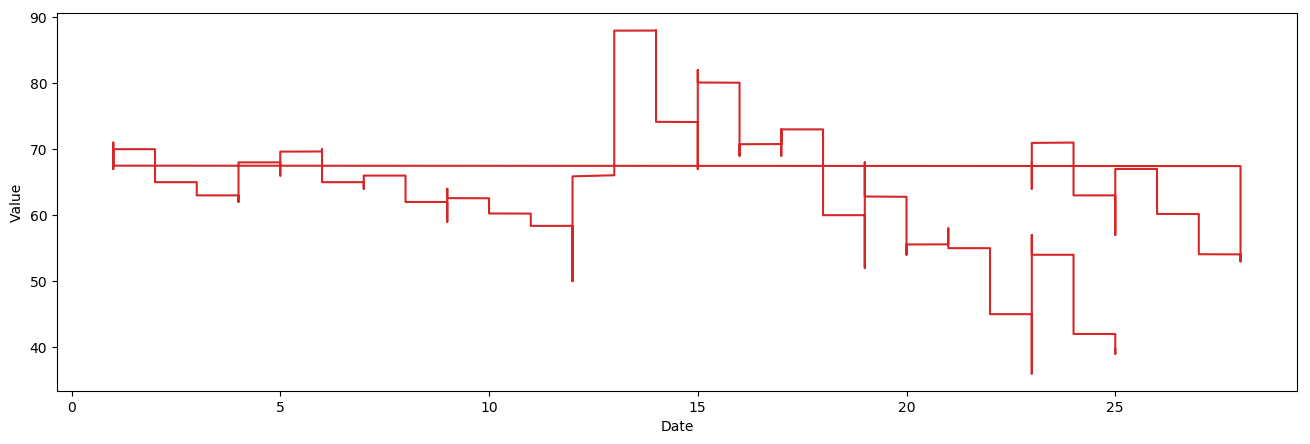

In [56]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train_1, x=train_1.day, y=train_1['Soil humidity 1'], title='')   

# Modeling

In [61]:
import xgboost as xgb

params = {'min_child_weight': 50, 'colsample_bytree': 0.8, 'max_depth': 7,
          'eta': 0.004,'n_estimators':600,'learning_rate' :0.1101,  'booster' : 'gbtree', 'silent': 1,'metric':'rmse',
               'objective': 'reg:linear','colsample_bytree': 0.3,"alpha":0.1, 'lambda': 7 ,} 


In [163]:
train_columns = ['month','weekofyear', 'day', 'dayofweek', 'dayofyear',
       #'is_weekend',
                 'hour', 
                 #'minute', 
                 'minuteofday',
                 #'AM/PM',
                 "hourofmonth","minuteofmonth","hourofyear","minuteofyear",
                 #"timestamp",
                'sin_hour','cos_hour',
                 #'sin_minute','cos_minute',
               # "log_weekofyear","log_dayofyear","log_minuteofday","log_hourofmonth","log_minuteofmonth",
                #"log_hourofyear","log_minuteofyear",
                 #"secondofyear","secondofmonth","secondofday",
                'Irrigation field 1',
                # 'quarter',
                ]
target = 'Soil humidity 1'
X_1 = train_1[train_columns]
Y_1 = train_1[target]
x_test_1 = test_1[train_columns]
features_name =x_test_1.columns


train_columns = ['month', 'weekofyear', 'day', 'dayofweek',  'dayofyear',
       #'is_weekend',
                 'hour', 
                 #'minute', 
                 'minuteofday',
                 #'AM/PM',
                 "hourofmonth","minuteofmonth","hourofyear","minuteofyear",
                 #"timestamp",
                'sin_hour','cos_hour',
                 #'sin_minute','cos_minute',
               # "log_weekofyear","log_dayofyear","log_minuteofday","log_hourofmonth","log_minuteofmonth",
                #"log_hourofyear","log_minuteofyear",
                 # "secondofyear","secondofmonth","secondofday",
               'Irrigation field 2',
                  #  'quarter',
                ]
target = 'Soil humidity 2'
X_2 = train_2[train_columns]
Y_2 = train_2[target]
x_test_2 = test_2[train_columns]
features_name =x_test_2.columns

train_columns = ['month', 'weekofyear', 'day', 'dayofweek',  'dayofyear',
      #'is_weekend',
                 'hour', 
                 #'minute', 
                 'minuteofday',
                 #'AM/PM',
                 "hourofmonth","minuteofmonth","hourofyear","minuteofyear",
                 #"timestamp",
                'sin_hour','cos_hour',
                 #'sin_minute','cos_minute',
               # "log_weekofyear","log_dayofyear","log_minuteofday","log_hourofmonth","log_minuteofmonth",
                #"log_hourofyear","log_minuteofyear",
               #  "secondofyear","secondofmonth","secondofday",
               'Irrigation field 3',
               #     'quarter',
                ]

target = 'Soil humidity 3'
X_3 = train_3[train_columns]
Y_3 = train_3[target]
x_test_3 = test_3[train_columns]
features_name =x_test_3.columns


train_columns = ['month', 'weekofyear', 'day', 'dayofweek',  'dayofyear',
       #'is_weekend',
                 'hour', 
                 #'minute', 
                 'minuteofday',
                 #'AM/PM',
                 "hourofmonth","minuteofmonth","hourofyear","minuteofyear",
                 #"timestamp",
                'sin_hour','cos_hour',
                 #'sin_minute','cos_minute',
               # "log_weekofyear","log_dayofyear","log_minuteofday","log_hourofmonth","log_minuteofmonth",
                #"log_hourofyear","log_minuteofyear",
                # "secondofyear","secondofmonth","secondofday",
                'Irrigation field 4',
                 #   'quarter',
                ] 

target = 'Soil humidity 4'
X_4 = train_4[train_columns]
Y_4 = train_4[target]
x_test_4 = test_4[train_columns]
features_name =x_test_4.columns


## Normal catboost

In [164]:
from sklearn.model_selection import train_test_split
x_train_1, x_val_1, y_train_1, y_val_1  = train_test_split(X_1, Y_1 ,test_size=0.20 ,random_state=17 )
from sklearn.model_selection import train_test_split
x_train_2, x_val_2, y_train_2, y_val_2  = train_test_split(X_2, Y_2 ,test_size=0.20 ,random_state=17 )
from sklearn.model_selection import train_test_split
x_train_3, x_val_3, y_train_3, y_val_3  = train_test_split(X_3, Y_3 ,test_size=0.20 ,random_state=17 )
from sklearn.model_selection import train_test_split
x_train_4, x_val_4, y_train_4, y_val_4  = train_test_split(X_4, Y_4 ,test_size=0.20 ,random_state=17 )


In [139]:
from math import sqrt

from catboost import CatBoostRegressor
model = CatBoostRegressor( iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE')
#,
model.fit(x_train_1,y_train_1,verbose=False)
#model.fit(X_1,Y_1,verbose=False)

y_eval_1 =  model.predict(x_val_1)
print(sqrt(mean_squared_error(y_eval_1, y_val_1)))
y_test_pred_1 = model.predict(x_test_1)

#model = CatBoostRegressor( iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE')

model.fit(x_train_2,y_train_2,verbose=False)
#model.fit(X_2,Y_2,verbose=False)

y_eval_2 =  model.predict(x_val_2)
print(sqrt(mean_squared_error(y_eval_2, y_val_2)))
y_test_pred_2 = model.predict(x_test_2)

#model = CatBoostRegressor( iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE')

model.fit(x_train_3,y_train_3,verbose=False)
#model.fit(X_3,Y_3,verbose=False)

y_eval_3 =  model.predict(x_val_3)
print(sqrt(mean_squared_error(y_eval_3, y_val_3)))
y_test_pred_3 = model.predict(x_test_3)

#model = CatBoostRegressor( iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE')

model.fit(x_train_4,y_train_4,verbose=False)
#model.fit(X_4,Y_4,verbose=False)

y_eval_4 =  model.predict(x_val_4)
print(sqrt(mean_squared_error(y_eval_4, y_val_4)))
y_test_pred_4 = model.predict(x_test_4)





0.5590839954583936
1.952660189469118
1.4279962436027658
1.600335061547657



###one model :  iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE'
0.5142004257227136
1.9847718229711366
1.3067439367496607
1.467833726404112
#####learning_rate 0.11
0.49075281468752624
1.8846762076379515
1.3395282002630178
1.5521548415802422

####learning_rate:0.09
0.4676784175332452
2.013663813981217
1.3568990000601906
1.5489789739427253


####learning_rate:0.15
0.48023917969487684
1.8809029188259225
1.2458045757091492
1.4684770255335022

####learning_rate:0.1
0.5082207784062955
1.9404210155067825
1.3915134875649133
1.5123170194631852

####learning_rate:0.06
0.653917096668005
2.1566843557236837
1.5106778835413877
1.698893806943793

In [165]:
import xgboost as xgb
from xgboost import  XGBRegressor,cv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from math import sqrt
model = XGBRegressor(n_estimators=2000,learning_rate =0.110101, metric = 'rmse')
                      

#,
model.fit(x_train_1,y_train_1)
#model.fit(X_1,Y_1,verbose=False)

y_eval_1 =  model.predict(x_val_1)
print(sqrt(mean_squared_error(y_eval_1, y_val_1)))
y_test_pred_1 = model.predict(x_test_1)

#model = CatBoostRegressor( iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE')

model.fit(x_train_2,y_train_2)
#model.fit(X_2,Y_2,verbose=False)

y_eval_2 =  model.predict(x_val_2)
print(sqrt(mean_squared_error(y_eval_2, y_val_2)))
y_test_pred_2 = model.predict(x_test_2)

#model = CatBoostRegressor( iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE')

model.fit(x_train_3,y_train_3)
#model.fit(X_3,Y_3,verbose=False)

y_eval_3 =  model.predict(x_val_3)
print(sqrt(mean_squared_error(y_eval_3, y_val_3)))
y_test_pred_3 = model.predict(x_test_3)

#model = CatBoostRegressor( iterations=1000, depth=7, l2_leaf_reg = 10,   learning_rate= 0.11, loss_function='RMSE')

model.fit(x_train_4,y_train_4)
#model.fit(X_4,Y_4,verbose=False)

y_eval_4 =  model.predict(x_val_4)
print(sqrt(mean_squared_error(y_eval_4, y_val_4)))
y_test_pred_4 = model.predict(x_test_4)









C:\Users\Aymen\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.19424636349550606


C:\Users\Aymen\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7153625171777622


C:\Users\Aymen\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.4958846410236255


C:\Users\Aymen\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.7054560430391007


n_estimators=2000,learning_rate =0.110101, metric = 'rmse'
0.1920200994771954/0.7075888048492553/0.4374466243515053/0.6725060139563208
######n_estimators=2000,learning_rate =0.1, metric = 'rmse'
0.18612878778487515/0.7415231149435639/0.49011647364366573/0.7311602948593602


#n_estimators=1000,learning_rate =0.110101, metric = 'rmse'
0.22656345500813255 /1.34665854362142 / 0.7351652942682646 / 1.7116316812352186
#n_estimators=1500,learning_rate =0.110101, metric = 'rmse'
0.14800901230214716 /0.6508365815025623 /0.44049245973628853/ 0.7718995926206698
###############n_estimators=2000,learning_rate =0.110101, metric = 'rmse'
0.12977144085180803/0.5746813242699513/0.3912930798555285/ 0.648105814407947
#n_estimators=3000,learning_rate =0.110101, metric = 'rmse'
0.11750584504433978/0.4828577404458118/0.345684348376633/0.5295804693687348
#n_estimators=2000,learning_rate =0.15, metric = 'rmse'
0.12426620054954131/0.5403772159317559/0.34542942855095/0.5828601290056785

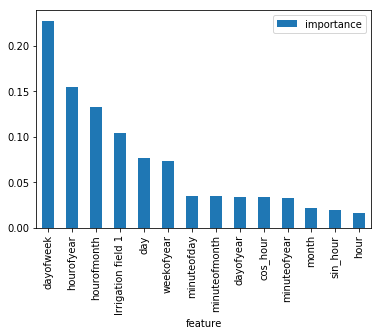

In [166]:
importances = pd.DataFrame({'feature':x_train_1.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances
importances.plot.bar()

In [167]:
y_pred_cb = np.concatenate((y_test_pred_1, y_test_pred_2), axis=0)
y_pred_cb = np.concatenate((y_pred_cb, y_test_pred_3), axis=0)
y_pred_cb = np.concatenate((y_pred_cb, y_test_pred_4), axis=0)


In [168]:
#submission= pd.DataFrame({'ID':sub["ID"],'Values':y_pred})
#submission= pd.DataFrame({'ID':sub["ID"],'Values':y_pred_xgb})
submission= pd.DataFrame({'ID':sub["ID"],'Values':y_pred_cb})

submission.to_csv("submission.csv",index=False)

In [169]:
submission=pd.read_csv("submission.csv")
submission.head()

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,39.680496
1,2019-03-25 22:55:00 x Soil humidity 1,39.686417
2,2019-03-25 23:00:00 x Soil humidity 1,39.731560
3,2019-03-25 23:05:00 x Soil humidity 1,39.731560
4,2019-03-25 23:10:00 x Soil humidity 1,39.731560
